In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
dataset= pd.read_csv("Housing.csv")
#n=100
#dataset = pd.DataFrame(np.repeat(dataset.values, n, axis=0), columns=dataset.columns)


x= dataset.iloc[:,1:4].values
y=dataset.iloc[:,0].values


In [ ]:
print(type(y))

<class 'numpy.ndarray'>


In [ ]:
print(dataset.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest= sc.transform(xtest)

In [ ]:
ytrain = sc.fit_transform(ytrain.reshape(-1,1))
ytest= sc.transform(ytest.reshape(-1,1))


In [ ]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
ypred= reg.predict(xtest)

In [ ]:
print(sc.inverse_transform(ypred))

[[ 3959098.84071357]
 [ 6297401.95435691]
 [ 4242278.46828465]
 [ 7279069.5626356 ]
 [ 4325492.10222214]
 [ 6334387.60285959]
 [ 3896688.61526046]
 [ 3742743.39247611]
 [ 3248201.13470382]
 [ 7944824.69173356]
 [ 6696620.18267128]
 [ 3942456.11392608]
 [ 3730261.34738549]
 [ 4816199.27026967]
 [ 4784994.15754311]
 [ 3305871.81430431]
 [ 3825703.75422996]
 [ 4799556.54348217]
 [ 3584637.48799489]
 [ 3659276.48635499]
 [ 7083310.30829696]
 [ 6375994.41982833]
 [ 4375167.010401  ]
 [ 3002142.05043249]
 [ 4965983.81135714]
 [ 5002969.45985983]
 [ 5207303.34977585]
 [ 4658093.36578845]
 [ 6462908.24869351]
 [ 4965983.81135714]
 [ 3617669.66938625]
 [ 3241381.24800276]
 [ 5789798.78733825]
 [ 3467885.12829878]
 [ 3592958.85138864]
 [ 4466448.7355486 ]
 [ 5299091.61929071]
 [ 3558009.12513489]
 [ 2714548.46898091]
 [ 3199774.43103402]
 [ 7228934.16768756]
 [ 6655013.36570254]
 [ 6105550.10953151]
 [ 4581120.75439627]
 [ 3759386.11926361]
 [ 6188763.74346899]
 [ 4025669.74786356]
 [ 3467885.12

In [ ]:
print(np.concatenate((sc.inverse_transform(ypred), sc.inverse_transform(ytest))))

[[ 3959098.84071357]
 [ 6297401.95435691]
 [ 4242278.46828465]
 [ 7279069.5626356 ]
 [ 4325492.10222214]
 [ 6334387.60285959]
 [ 3896688.61526046]
 [ 3742743.39247611]
 [ 3248201.13470382]
 [ 7944824.69173356]
 [ 6696620.18267128]
 [ 3942456.11392608]
 [ 3730261.34738549]
 [ 4816199.27026967]
 [ 4784994.15754311]
 [ 3305871.81430431]
 [ 3825703.75422996]
 [ 4799556.54348217]
 [ 3584637.48799489]
 [ 3659276.48635499]
 [ 7083310.30829696]
 [ 6375994.41982833]
 [ 4375167.010401  ]
 [ 3002142.05043249]
 [ 4965983.81135714]
 [ 5002969.45985983]
 [ 5207303.34977585]
 [ 4658093.36578845]
 [ 6462908.24869351]
 [ 4965983.81135714]
 [ 3617669.66938625]
 [ 3241381.24800276]
 [ 5789798.78733825]
 [ 3467885.12829878]
 [ 3592958.85138864]
 [ 4466448.7355486 ]
 [ 5299091.61929071]
 [ 3558009.12513489]
 [ 2714548.46898091]
 [ 3199774.43103402]
 [ 7228934.16768756]
 [ 6655013.36570254]
 [ 6105550.10953151]
 [ 4581120.75439627]
 [ 3759386.11926361]
 [ 6188763.74346899]
 [ 4025669.74786356]
 [ 3467885.12

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(ytest,ypred))


0.5041100166137953


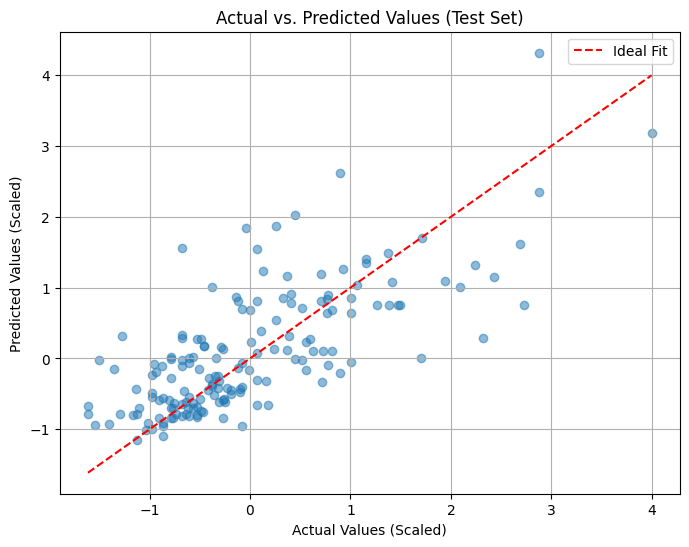

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred, alpha=0.5)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--', label='Ideal Fit') # 45-degree line
plt.title('Actual vs. Predicted Values (Test Set)')
plt.xlabel('Actual Values (Scaled)')
plt.ylabel('Predicted Values (Scaled)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print(ypred.shape, ytest.shape)

(164, 1) (164, 1)
